# Deterministic Diffusion Models (DDM): 2D, Ex. 1
> For the Fall 2024 course: *Machine Learning in Physics*<br>
> Created: Aug. 14, 2024 Harrison B. Prosper

See $\texttt{sdeutil.ipynb}$ for an introduction.

In [2]:
import os
import torch
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#%matplotlib inline

# to plot pixelized images
import imageio.v3 as im

import sdeutil as sd

# module to access data in Hierarchical Data Format (HDF or H5 format)
import h5py

# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

# set random number seed
if 'SEED' in os.environ:
    seed = int(os.environ['SEED'])
else:
    seed = 42
print(f'SEED: {seed:d}')

rnd  = np.random.RandomState(seed)


	Computational device: cpu 

SEED: 42


## Load Data

In [3]:
filename = '../data/spiral.h5'

f = h5py.File(filename, "r")

X0 = np.array(f['X0'])

X0.shape

(100000, 2)

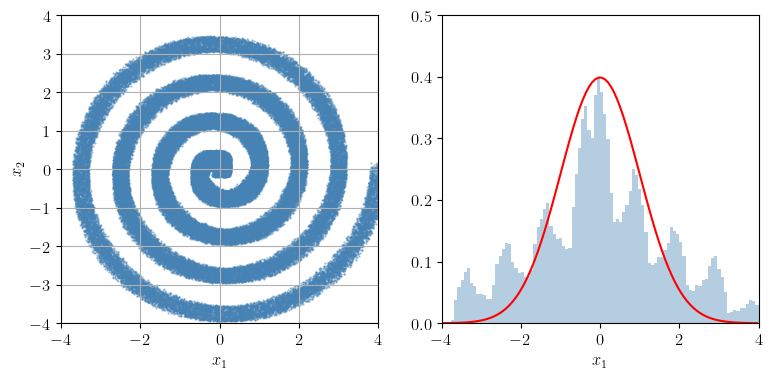

In [4]:
def plot_data(d, xmin=-4, xmax=4, ymin=-4, ymax=4, filename='fig_spiral.png'):

    x1, x2 = d[:, 0], d[:, 1]
    
    fig = plt.figure(figsize=(9, 4))
    fig.tight_layout()
    
    ax  = fig.add_subplot(1, 2, 1)
    
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$')
    
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$')
    
    ax.scatter(x1, x2, s=0.5, color='steelblue', alpha=0.4)

    ax.grid('both')

    ax2  = fig.add_subplot(1, 2, 2)
    ax2.set_xlim(xmin, xmax)
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylim(0, 0.5)
    
    c, x, _ = ax2.hist(x1, range=(xmin, xmax), bins=100, density=True, 
                       color='steelblue', alpha=0.4)
    x = (x[1:]+x[:-1])/2
    h = x[1]-x[0]
    y = st.norm.pdf(x)
    ax2.plot(x, y, color='red')
    
    if filename:
        plt.savefig(filename)
        
    plt.show()

plot_data(X0)

## Reverse Time ODE
Let  $x_t \equiv x(t)$ be a $d$-dimensional vector at time $t$. Map the vector $x_1$ at time $t = 1$ 
deterministically to the vector at time $x_0$ at time $t = 0$ by solving the differential vector-valued equation
\begin{align}
    \frac{dx_t}{dt} &= \frac{x_t  - q(t, x_t)}{t} \equiv G(t, x_t) , \text{ where}\\
 q(t, x_t) & = \int_{\mathbb{R}^d}  x_0 \, p(x_0 | x_t) \, dx_0,  \\
 p(x_0 | x_t) & = \frac{p(x_t | x_0) \, p(x_0)} {p(x_t)}, \\
& = \frac{\exp \left(-\frac{1}{2}  z^2 \right) \, p(x_0) } {\int_{\mathbb{R}^d} \exp \left(-\frac{1}{2}  z^2 \right) \, p(x_0) \, d x_0} \text{ and the vector } z(t) \text{ is given by }
    z(t) = \frac{x(t) - (1 - t) \, x(0)}{t} .
\end{align}
The point $x_1$ is sampled from a diagonal $d$-dimensional Gaussian of zero mean, unit variance and $x_0 \sim p(x_0)$, where $p(x_0)$ is the target distribution.

See $\texttt{sdeutil.ipynb}$ for details.

In [5]:
N = 4000
B = 8000

x1 = sd.get_normal_sample(X0[:N])

x0 = sd.get_batch(X0, B)

ode = sd.PyFlowODE(x0, savepath=True)

y = ode(x1)
    
plotfig(y[-1])     

100%|█████████████████████████████████████████| 999/999 [02:48<00:00,  5.91it/s]


NameError: name 'plotfig' is not defined

## Animate flow

In [9]:
anim = sd.Flow2DAnimation(y, mcolor='steelblue')
anim.show()

frame: 49

In [7]:
anim.save('flow.gif')
anim.save('flow.mp4')

frame: 49